In [25]:
import pandas as pd
from pandas import read_csv, DataFrame
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix


In [26]:
df = read_csv('tyg1.csv')
df.head()

# df = pd.read_excel('mau.xlsx')
# df.head()

,subject_id,hadm_id,stay_id,intime,age,gender,race,los,diabetes,hypertension,...,has_ercp,has_vasopressin,los_icu,los_hosp,hosp_mortality,icu_mortality,mortality_7d,mortality_28d,mortality_90d,mortality_1y
0,10004606,29242151,30213599,2159-02-20 16:10:03,64,F,WHITE,5.166100,0,1,...,0,0,5.166100,14.130556,0,0,0,0,0,0
1,10006441,24120560,37240744,2174-09-12 16:57:04,51,M,WHITE,0.776481,0,0,...,0,0,0.776481,15.834722,0,0,0,0,0,0
2,10007795,28477357,31921355,2136-04-22 18:01:13,53,F,WHITE,1.050521,0,1,...,0,0,1.050521,21.834722,0,0,0,0,0,0
3,10010888,20162667,33318955,2174-01-09 00:21:00,43,M,WHITE,9.019225,1,0,...,0,0,9.019225,17.736806,0,0,0,0,0,0
4,10012206,23961896,37675714,2127-07-04 02:08:00,45,M,WHITE,0.572477,1,1,...,0,0,0.572477,10.655556,0,0,0,0,0,0


In [27]:
model_linear = smf.glm(formula='sepsis ~ tyg', data=df, family = sm.families.Binomial())
result_linear = model_linear.fit()
result_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                  656
Model:                            GLM   Df Residuals:                      654
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -422.09
Date:                Sat, 29 Nov 2025   Deviance:                       844.17
Time:                        22:30:20   Pearson chi2:                     656.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008762
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7241      0.886     -3.073      0.002      -4.461      -0.987
tyg            0.2133      0.089      2.394      0.017       0.039       0.388
==============================================================================
"""

In [28]:
n_knof = 3
model_spline = smf.glm(formula=f'sepsis ~ bs(tyg, df = {n_knof}, include_intercept = False)', data=df, family=sm.families.Binomial())
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                  656
Model:                            GLM   Df Residuals:                      652
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -421.88
Date:                Sat, 29 Nov 2025   Deviance:                       843.77
Time:                        22:30:20   Pearson chi2:                     656.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009371
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.6754      0.818     -0.825      0.409      -2.280       0.929
bs(tyg, df=3, include_intercept=False)[0]    -0.6398      1.877     -0.341      0.733      -4.319       3.040
bs(tyg, df=3, include_intercept=False)[1]     0.6948      0.866      0.802      0.422      -1.003       2.392
bs(tyg, df=3, include_intercept=False)[2]     0.7549      1.428      0.529      0.597      -2.044       3.554
=============================================================================================================
"""

In [29]:
LR = 2 * (result_spline.llf - result_linear.llf)
df_diff = result_spline.df_model - result_linear.df_model
p_nonlinear = chi2.sf(LR, df_diff)
p_nonlinear

0.8174921212741919

In [30]:
def format_p(p):
    if p < 0.001:
        return 'p<0.001'
    return f'{p:.3f}'

In [31]:
# mortalities = ['mortality_7d', 'mortality_28d', 'mortality_90d', 'mortality_1y']
# fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 18))
# axes = axes.flatten()
# n_knof = 3
# for i in range(4):
#     model_linear = smf.glm(formula = f'{mortalities[i]} ~ tyg', data=df, family = sm.families.Binomial())
#     result_linear = model_linear.fit()
#     model_spline = smf.glm(formula = f'{mortalities[i]} ~ bs(tyg, df = {n_knof}, include_intercept = False)', data=df, family=sm.families.Binomial())
#     result_spline = model_spline.fit()
#     LR = 2 * (result_spline.llf - result_linear.llf)
#     df_diff = result_spline.df_model - result_linear.df_model
#     p_nonlinear = chi2.sf(LR, df_diff)

#     x_pred = DataFrame(data = {'tyg': np.linspace(df['tyg'].min(), df['tyg'].max(), 100)})
#     result_pred = result_spline.get_prediction(x_pred)
#     pred_mean = result_pred.predicted_mean
#     ci = result_pred.conf_int()
#     ax = axes[i]
#     ax.plot(x_pred, pred_mean, label="Fitted", color='red')
#     ax.fill_between(x_pred['tyg'].values, ci[:,0], ci[:,1], color='red', alpha=0.2)

#     ax.axhline(y=0.5, color='black', linestyle='--', linewidth=0.8)
    
#     ax.axvline(x=df["tyg"].median(), color='gray', linestyle='--', linewidth=0.7)

#     # Add histogram
#     ax2 = ax.twinx()
#     sns.histplot(df["tyg"], ax=ax2, bins=40, color='blue', alpha=0.3, stat="density")
#     ax2.set_yticks([])

#     # Set labels
#     ax.set_xlabel("NPAR")
#     ax.set_ylabel(f"{mortalities[i]} days probability")
#     ax.set_title(f"Logistic Regression {mortalities[i]}")
#     text = f"P-nonlinear {format_p(p_nonlinear)}"
#     ax.text(0.98, 0.90, text, transform=ax.transAxes, ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    

# plt.show()


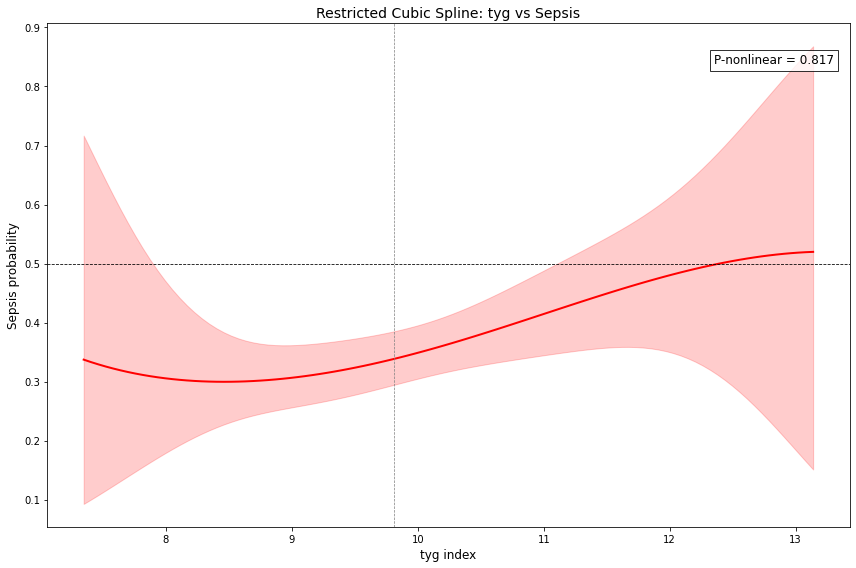

In [32]:
# 4) Tạo dữ liệu dự đoán
# -------------------------
x_pred = pd.DataFrame({ "tyg": np.linspace(df["tyg"].min(), df["tyg"].max(), 100)})
result_pred = result_spline.get_prediction(x_pred)
pred_mean = result_pred.predicted_mean
ci = result_pred.conf_int()

# -------------------------
# 5) Vẽ biểu đồ RCS
# -------------------------
plt.figure(figsize=(12, 8))

# Đường fitted spline
plt.plot(x_pred["tyg"], pred_mean, color="red", linewidth=2, label="Spline fitted")

# Dải CI
plt.fill_between(x_pred["tyg"], ci[:, 0], ci[:, 1], color="red", alpha=0.2)

# # Histogram phân bố tyg
# ax2 = plt.twinx()
# sns.histplot(df["tyg"], bins=40, color="blue", alpha=0.3, stat="density", ax=ax2)
# ax2.set_yticks([])

# Các chi tiết
plt.axhline(y=0.5, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=df["tyg"].median(), color="gray", linestyle="--", linewidth=0.7)

plt.xlabel("tyg index", fontsize=12)
plt.ylabel("Sepsis probability", fontsize=12)
plt.title("Restricted Cubic Spline: tyg vs Sepsis", fontsize=14)

# Hiển thị p-nonlinear
plt.text(0.98, 0.92, f"P-nonlinear = {format_p(p_nonlinear)}",
         transform=plt.gca().transAxes, fontsize=12, horizontalalignment='right', bbox=dict(facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()